<a href="https://colab.research.google.com/github/soleme/web-ai-hub/blob/main/tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)
print(lemon.shape)
lemon.head()

(6, 2)


,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [5]:
독립 = lemon[['온도']]
종속 = lemon[['판매량']]

print(독립.head(2))
print(종속.head(2))

   온도
0  20
1  21
   판매량
0   40
1   42


In [6]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.shape)
boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
print(boston.columns)
독립 = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
종속 = boston[['medv']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)
      crim    zn  indus  chas    nox  ...  rad  tax  ptratio      b  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.9   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.9   9.14

[2 rows x 13 columns]
   medv
0  24.0
1  21.6


In [8]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"
iris = pd.read_csv(path)
print(iris.shape)
iris.head()

(150, 5)


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 첫번째 딥러닝 - 레모네이드 판매 예측
###"https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"

In [14]:
import tensorflow as tf
import pandas as pd
# 데이터를 준비합니다.

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)

x_lemon = lemon[['온도']]
y_lemon = lemon[['판매량']]
print(x_lemon.shape, y_lemon.shape)

(6, 1) (6, 1)


In [17]:
# 모델을 생성합니다.
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss="mse")

In [31]:
model.fit(x_lemon, y_lemon, epochs=1000, verbose=0)
model.fit(x_lemon, y_lemon, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4308e-04
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4256e-04
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 6.4229e-04
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 6.4197e-04
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4160e-04
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4118e-04
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4062e-04
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 6.4008e-04
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 6.3955e-04
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 6.3899e-04


In [32]:
# 모델을 이용합니다.
model.predict(x_lemon)

array([[40.023785],
       [42.010227],
       [43.996666],
       [45.983105],
       [47.969547],
       [49.95599 ]], dtype=float32)

In [33]:
model.get_weights()

[array([[1.9864407]], dtype=float32), array([0.29497144], dtype=float32)]

In [25]:
0.22441791 * 20 + 0.03882809

4.52718629

## 두번째 딥러닝 - 보스턴 집값 예측
-"https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"

In [37]:
import pandas as pd
import tensorflow as tf

# 데이터를 준비한다
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.columns)

x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]       
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


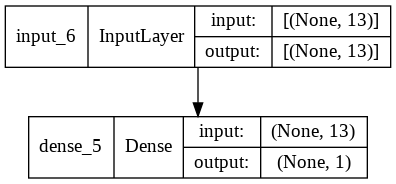

In [41]:
# 모델을 준비한다
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse")

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [44]:
# 모델을 데이터로 학습시킨다
model.fit(x_boston, y_boston, epochs=1000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 24.9535
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 24.7684
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 24.7085
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 24.8790
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 24.5154
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 24.6712
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 24.5717
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 24.7677
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.6122
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 24.9311


In [45]:
# 모델을 이용한다
model.predict(x_boston[:5])

array([[30.034752],
       [24.866808],
       [31.257698],
       [30.170763],
       [29.726696]], dtype=float32)

In [47]:
model.get_weights()

[array([[-0.08748121],
        [ 0.0540995 ],
        [-0.04336084],
        [ 2.9176128 ],
        [ 2.0115478 ],
        [ 5.023054  ],
        [-0.00601643],
        [-0.9817363 ],
        [ 0.17508905],
        [-0.00998509],
        [-0.3218031 ],
        [ 0.01461662],
        [-0.49034646]], dtype=float32), array([3.8051312], dtype=float32)]